In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import cv2
import os
from tqdm import tqdm
from glob import glob
from pathlib import Path
from tensorflow.keras.utils import to_categorical

#from sklearn.model_selection import train_test_split
import tensorflow as tf 

from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.xception import preprocess_input

#from sklearn.metrics import f1_score
import tensorflow.keras.backend as K

import random
import matplotlib.pyplot as plt

#### Auxiliar Functions

In [2]:
#Function for plotting images.
def plot_sample(X):
    # Plotting 6 sample images
    nb_rows = 3
    nb_cols = 3
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))

    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(X[random.randint(0, X.shape[0]-1)])

In [3]:
def read_data(path_list, im_size=(128,128)):
    
    X = []
    y = []
    for path in path_list:
    #extracting the label name from data files.
        tag2idx = {tag:i for i, tag in enumerate(os.listdir(path))} #Problem with the labels. If I split on -2 can't append to y. If I split on -1 labels=image_name
        print(tag2idx)
    #tag2idx = {tag:i for i, tag in enumerate(tqdm(glob(path + "*/*")))}
   
        for im_file in tqdm(glob(path + '*/*')):
            try:
                #print('test1')
                label = im_file.split(os.path.sep)[-2] #os.path.separator is OS agnostic (either '/' or '\')
                print(label)
                im = cv2.imread(im_file)
                #print('test2')
                im = cv2.resize(im, im_size,interpolation=cv2.INTER_LINEAR)
                #print('test3')
                im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
                #print('test4')
                X.append(im)
                #print('test5')
                y.append(tag2idx[label])  #appending the label names to y 
                print('test6')
            except Exception as e:
                # In case annotations or metadata are found
                print("Not a picture")
    
    X = np.array(X)
    y = np.eye(len(np.unique(y)))[y].astype(np.uint8)
    
    return X, y

In [4]:
INPUT_SHAPE = (128, 128, 3)
IM_SIZE = (128, 128)
EPOCHS = 50
BATCH_SIZE = 48
TEST_SPLIT = 0.15
VAL_SPLIT = 0.15
RANDOM_STATE = 2020
WEIGHTS_FILE = "weights.h5"#File that stores updated weights
IM_PATH = 'eden_data/Tomato' # Path to the Eden data
IM_PATH2 = 'eden_data/nightshade' # 

In [5]:
data_path1 = str(Path(Path.cwd()).parents[1].joinpath(IM_PATH))
data_path2 = str(Path(Path.cwd()).parents[1].joinpath(IM_PATH2))
path_list = [data_path1,data_path2]

print(path_list)
X,y = read_data(path_list, IM_SIZE)

     | 67/200 [00:26<00:53,  2.50it/s]Not a picture
Tomato
 34%|███▍      | 68/200 [00:27<00:51,  2.58it/s]Not a picture
Tomato
 34%|███▍      | 69/200 [00:27<00:49,  2.64it/s]Not a picture
Tomato
 35%|███▌      | 70/200 [00:28<00:49,  2.62it/s]Not a picture
Tomato
 36%|███▌      | 71/200 [00:28<00:49,  2.61it/s]Not a picture
Tomato
 36%|███▌      | 72/200 [00:28<00:49,  2.58it/s]Not a picture
Tomato
 36%|███▋      | 73/200 [00:29<00:48,  2.64it/s]Not a picture
Tomato
 37%|███▋      | 74/200 [00:29<00:46,  2.72it/s]Not a picture
Tomato
 38%|███▊      | 75/200 [00:29<00:45,  2.73it/s]Not a picture
Tomato
 38%|███▊      | 76/200 [00:30<00:45,  2.71it/s]Not a picture
Tomato
 38%|███▊      | 77/200 [00:30<00:45,  2.68it/s]Not a picture
Tomato
 39%|███▉      | 78/200 [00:31<00:47,  2.59it/s]Not a picture
Tomato
 40%|███▉      | 79/200 [00:31<00:48,  2.49it/s]Not a picture
Tomato
 40%|████      | 80/200 [00:31<00:50,  2.36it/s]Not a picture
Tomato
 40%|████      | 81/200 [00:32<00:49,  2.41i

In [6]:
os.path.exists(path.li)
os.listdir(data_path)

NameError: name 'path' is not defined

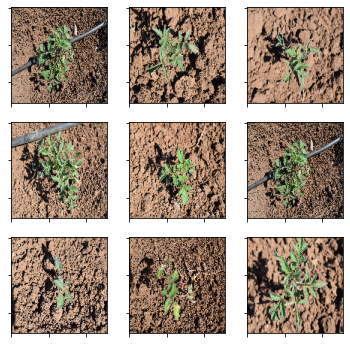

In [11]:
# Class 0
plot_sample(np.array(X[:50]))

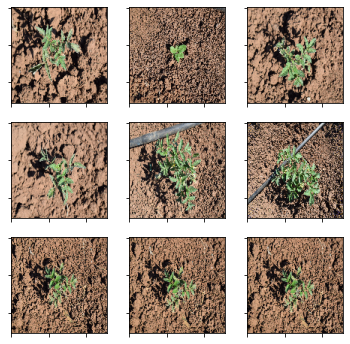

In [13]:
# Class 1
plot_sample(np.array(X[:50]))

In [10]:
print(len(x))

200
